# Retail data analytics

The dataset, available at https://www.kaggle.com/manjeetsingh/retaildataset, contains:
"""
historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.
"""

## Tasks 
The following activities will be conducted: 

1. Brief description of the data set and a summary of its attributes

2. Initial plan for data exploration

3. Actions taken for data cleaning and feature engineering

4. Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

5. Formulating at least 3 hypothesis about this data:
    1. Are sales larger or smaller in a given week if preceded by a holiday week?
    2. Are sales larger or smaller on normal weeks or holiday weeks?
    3. Are sales larger or smaller on weekends or on weekdays? 

6. Conducting a formal significance test for one of the hypotheses and discuss the results 

7. Suggestions for next steps in analyzing this data

8. A paragraph that summarizes the quality of this data set and a request for additional data if needed

## 1. Data description
There are three .csv files:

### Features

Contains additional data related to the store, department, and regional activity for the given dates.

    Store - the store number
    Date - the week
    Temperature - average temperature in the region
    Fuel_Price - cost of fuel in the region
    MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
    CPI - the consumer price index
    Unemployment - the unemployment rate
    IsHoliday - whether the week is a special holiday week

### Sales

Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

    Store - the store number
    Dept - the department number
    Date - the week
    Weekly_Sales -  sales for the given department in the given store
    IsHoliday - whether the week is a special holiday week

### Stores

Contains additional data related to the store, department, and regional activity for the given dates.

    Store - the store number
    Type - store type
    Size - store size
    

In [1]:
# Import python packages to be used
# %pylab inline
# %config InlineBackend.figure_formats = ['svg']
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
import math
import seaborn as sns

In [2]:
# Read data sources and convert them into dataframes
files = ['features', 'sales', 'stores']
datasets = {f: pd.read_csv('data/'+f+'.csv') for f in files}
features, sales, stores = datasets['features'], datasets['sales'], datasets['stores']

## 2. Initial plan for data exploration
We will see:

2.1. If there are invalid values.

2.2. Store characterization.

2.3. Range for weekly sales by store.

2.4. Evolution of fuel price, CPI, unemployment, and weekly sales in the region.

### 2.1. Invalid values
Let's see which columns have empty, zero, negative values, or incorrect data types (e.g. strings instead of numbers)

In [3]:
# Show each of the dataframes to see how many records and fields there are in each
for f in files:
    print('#'*10+' {0} '.format(f.upper())+'#'*10)
    display(datasets[f])
    print(datasets[f].dtypes)

########## FEATURES ##########


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object
########## SALES ##########


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object
########## STORES ##########


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


Store     int64
Type     object
Size      int64
dtype: object


Dates are being interpreted as 'object', so they have to be converted to datetimes.

In [4]:
for f in ['features', 'sales']:
    datasets[f].Date = pd.to_datetime(datasets[f].Date)

In [5]:
for f in files:
    print('\n'+'#'*10+' {0} '.format(f.upper())+'#'*10)
    columns = datasets[f].columns.values.tolist()
    for c in columns:
        if datasets[f][c].isnull().values.any():
            print('{0}: {1} invalid values found'.format(c, datasets[f][c].isnull().sum()))
        else:
            print('{0}: ok'.format(c))


########## FEATURES ##########
Store: ok
Date: ok
Temperature: ok
Fuel_Price: ok
MarkDown1: 4158 invalid values found
MarkDown2: 5269 invalid values found
MarkDown3: 4577 invalid values found
MarkDown4: 4726 invalid values found
MarkDown5: 4140 invalid values found
CPI: 585 invalid values found
Unemployment: 585 invalid values found
IsHoliday: ok

########## SALES ##########
Store: ok
Dept: ok
Date: ok
Weekly_Sales: ok
IsHoliday: ok

########## STORES ##########
Store: ok
Type: ok
Size: ok


No columns in our sales and stores dataframes are incomplete. However, there is a number of rows with incomplete values in the features dataframe. For the time being no action will be taken because we do not plan to check the markdowns, consumer price index or unemployment.

Next we should find negative and zero values in some columns where this might be nonsensical.

In [6]:
# Columns in each dataframe that will be checked for unusual values
cols_negcheck = {'features': ['Fuel_Price', 'CPI', 'Unemployment'],
                 'sales': ['Weekly_Sales'],
                 'stores': ['Size'],
                }
# Additional columns added to a temporary dataframe to count negative or zero values
for f in files: 
    df = datasets[f].copy()
    for c in cols_negcheck[f]:
        df.loc[df[c] == 0, c+'_zero'] = 1
        df.loc[df[c] != 0, c+'_zero'] = 0
        df.loc[df[c] < 0, c+'_negative'] = 1
        df.loc[df[c] > 0, c+'_negative'] = 0
        print('\nRows in {0}/{1}:'.format(f, c))
        rows = df.shape[0]
        print('  All: {0}'.format(rows))
        neg_rows = df[c+'_negative'].sum()
        print('  Negative: {0} ({1})'.format(neg_rows, '{:.2%}'.format(neg_rows/rows)))
        zero_rows = df[c+'_zero'].sum()
        print('  Zero: {0} ({1})'.format(zero_rows, '{:.2%}'.format(zero_rows/rows)))


Rows in features/Fuel_Price:
  All: 8190
  Negative: 0.0 (0.00%)
  Zero: 0.0 (0.00%)

Rows in features/CPI:
  All: 8190
  Negative: 0.0 (0.00%)
  Zero: 0.0 (0.00%)

Rows in features/Unemployment:
  All: 8190
  Negative: 0.0 (0.00%)
  Zero: 0.0 (0.00%)

Rows in sales/Weekly_Sales:
  All: 421570
  Negative: 1285.0 (0.30%)
  Zero: 73.0 (0.02%)

Rows in stores/Size:
  All: 45
  Negative: 0.0 (0.00%)
  Zero: 0.0 (0.00%)


There are 1285 rows where sales are negative and 73 where these are zero. Negative rows might happen if there are returns, but this is difficult to determine from the data.

As the number of negative or zero rows is very small, they will be removed before conducting the preliminary analyses, but this phenomenon does warrant further investigation.

### 2.2. Store characterization

[Text(0.5, 1.0, 'Stores by Type')]

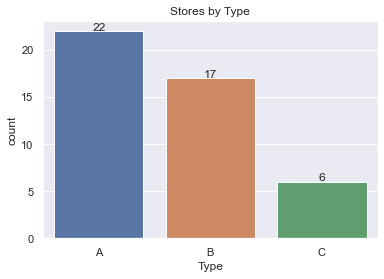

In [7]:
stores = datasets['stores']
sns.set(style='darkgrid')
ax = sns.countplot(x='Type', data=stores)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
ax.set(title='Stores by Type')

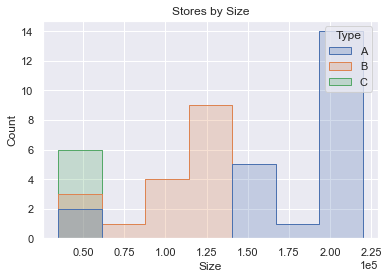

In [8]:
sns.set(style='darkgrid')
g = sns.histplot(stores, x='Size', hue='Type', element='step').set(title='Stores by Size')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

We see that 'A' stores are more frequent than 'B' stores and 'C' stores, while their size generally matches that order. It is possible that the smaller A and B stores have started existing later and for this reason they have had fewer sales.

Next, let's see how many departments exist.

In [9]:
depts = sales.Dept.unique()
depts.sort()
print('There are {0} unique departments.'.format(len(depts)))
print(depts)

There are 81 unique departments.
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 54 55 56 58 59 60 65 67 71 72 74 77 78 79 80 81 82 83 85 87 90
 91 92 93 94 95 96 97 98 99]


It is possible that stores contain different departments according to their type. We will merge two tables to associate stores to store types and store departments.

In [10]:
# Merge 'stores' and 'sales'
sales_stores = pd.merge(datasets['stores'], datasets['sales'], on='Store', how='outer')
sales_stores

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,2010-05-02,24924.50,False
1,1,A,151315,1,2010-12-02,46039.49,True
2,1,A,151315,1,2010-02-19,41595.55,False
3,1,A,151315,1,2010-02-26,19403.54,False
4,1,A,151315,1,2010-05-03,21827.90,False
...,...,...,...,...,...,...,...
421565,45,B,118221,98,2012-09-28,508.37,False
421566,45,B,118221,98,2012-05-10,628.10,False
421567,45,B,118221,98,2012-12-10,1061.02,False
421568,45,B,118221,98,2012-10-19,760.01,False


In [11]:
letters = ['A', 'B', 'C']
depts = dict()
for l in letters:
    d = sales_stores[sales_stores['Type'] == l]
    d = d.Dept.unique()
    d.sort()
    print('\nThere are {0} unique departments in stores of Type {1}.'.format(len(d), l))
    print(d)
    depts[l]= d

def notintersection(list1, list2):
    list3 = [x for x in list1 if x not in list2]
    return list3
    
print('\nDepartments that can exist in A but not in B: {0}'.format(notintersection(depts['A'], depts['B'])))
print('\nDepartments that can exist in B but not in C: {0}'.format(notintersection(depts['B'], depts['C'])))


There are 81 unique departments in stores of Type A.
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 54 55 56 58 59 60 65 67 71 72 74 77 78 79 80 81 82 83 85 87 90
 91 92 93 94 95 96 97 98 99]

There are 80 unique departments in stores of Type B.
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91
 92 93 94 95 96 97 98 99]

There are 66 unique departments in stores of Type C.
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 31 32 33 34 35 38 40 41 42 44 46 49 52 55 56 59 60 67 71 72
 74 79 80 81 82 83 85 87 90 91 92 93 94 95 96 97 98 99]

Departments that can exist in A but not in B: [65]

Departments that can exist in B but not in C: [30, 36, 37, 39, 43, 45, 47, 48, 50, 51, 54,

Stores of types 'A' and 'B' may contain virtually the same departments, while C stores may contain 15 or 14 fewer departments, respectively. 

There could be further analysis, for example by sales, but sales by department are not available. 

It is also possible that not all departments in the same class contain the same number of departments. Then, it would be possible to determine if there is a correlation between the number of departments in a store and the weekly sales there or its size.

### 2.3. Range of weekly sales by store
Let's look more carefully at weekly sales.

In [12]:
# Basic statistics
weekly_series = pd.DataFrame(sales_stores['Weekly_Sales'])
weekly_series.describe()

,Weekly_Sales
count,421570.000000
mean,15981.258123
std,22711.183519
min,-4988.940000
25%,2079.650000
50%,7612.030000
75%,20205.852500
max,693099.360000


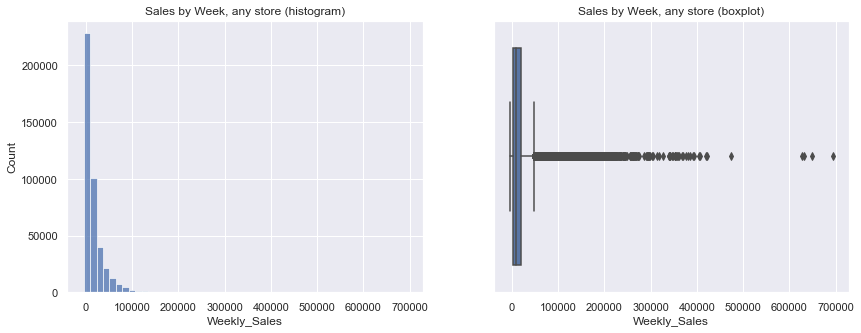

In [13]:
sns.set(style='darkgrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(14,5))
g= sns.histplot(weekly_series, x='Weekly_Sales', bins=50, ax=ax1).set(title='Sales by Week, any store (histogram)')
g= sns.boxplot(x=weekly_series["Weekly_Sales"], ax=ax2).set(title='Sales by Week, any store (boxplot)')

In addition to the weeks with negative or zero values previously discussed, there is a very small number of stores where sales are unusually high. Let's get a better idea of how many they are.

In [14]:
count, division = np.histogram(sales_stores['Weekly_Sales'], bins=50)
out, bins = pd.cut(sales_stores['Weekly_Sales'], bins=division, include_lowest=True, right=True, retbins=True)
counts = out.value_counts().head(35) # There are 15 empty bins at the high end, so we'll exclude them

def gen_cumulative(counts_df):
    """
    Generate a 'histogram' of stores according to a count
    """
    total = sum(counts_df.values)
    counts_df = pd.DataFrame(data={'Intervals': counts_df.index.to_list(), 'Count': counts_df.values})
    counts_df['Cumulative Count'] = counts_df['Count'].cumsum()/total
    counts_df['Remainder'] = 1 - counts_df['Cumulative Count'] # What would be left if highest values were excluded
    counts_df['Percentage'] = counts_df['Count']/total
    # Add format
    counts_df['Count'] = pd.Series(["{0:,}".format(round(val, 2)) for val in counts_df['Count']], index = counts_df.index)
    for c in ['Cumulative Count', 'Remainder', 'Percentage']:
        counts_df[c] = pd.Series(["{0:.2f}%".format(val * 100) for val in counts_df[c]], index = counts_df.index)
    return counts_df
    
counts = gen_cumulative(counts)
counts

,Intervals,Count,Cumulative Count,Remainder,Percentage
0,"(-4988.941, 8972.826]","228,240",54.14%,45.86%,54.14%
1,"(8972.826, 22934.592]","100,440",77.97%,22.03%,23.83%
2,"(22934.592, 36896.358]","39,914",87.43%,12.57%,9.47%
3,"(36896.358, 50858.124]","21,844",92.62%,7.38%,5.18%
4,"(50858.124, 64819.89]","12,686",95.62%,4.38%,3.01%
5,"(64819.89, 78781.656]","7,559",97.42%,2.58%,1.79%
6,"(78781.656, 92743.422]","4,332",98.45%,1.55%,1.03%
7,"(92743.422, 106705.188]","2,365",99.01%,0.99%,0.56%
8,"(106705.188, 120666.954]","1,496",99.36%,0.64%,0.35%
9,"(120666.954, 134628.72]",818,99.55%,0.45%,0.19%


### 2.4. Evolution of fuel price, CPI, unemployment, and weekly sales in all stores

Let's now see sale and price variations according to time. For this we will have to get the sum of sales across stores, and the mean price, respectively.

In [15]:
def calc_min_max_avg (df, var, sortby='Date', dropped_columns=[]):
    """
    Add columns with average, min, max of a variable in a dataframe, and remove all unnecessary columns.
    It is assumed there is a date or datetime column by which rows will be sorted.
    """
    df_agg = df.copy().drop(columns = dropped_columns)
    df_agg = df_agg.sort_values(by=sortby).reset_index().drop(columns = ['index'])
    df_agg[var+'_Min'] = df_agg.groupby(sortby)[var].transform(min)
    df_agg[var+'_Max'] = df_agg.groupby(sortby)[var].transform(max)
    q25, q50, q75 = [df_agg.groupby(sortby)[var].quantile([q]).transpose().values.tolist() for q in [.25, .50, .75]]
    df_agg = df_agg.drop(columns = [var]).drop_duplicates().reset_index().drop(columns = ['index'])
    df_agg[var+'_q25'], df_agg[var+'_q50'], df_agg[var+'_q75'] = q25, q50, q75
    return df_agg

features_agg = calc_min_max_avg(features, 
                                'Fuel_Price', 
                                'Date', 
                                ['Temperature', 'Store', 'MarkDown1', 'MarkDown2', 
                                     'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'])
features_agg2 = calc_min_max_avg(features, 
                                'CPI', 
                                'Date', 
                                ['Temperature', 'Store', 'MarkDown1', 'MarkDown2', 
                                     'MarkDown3', 'MarkDown4', 'MarkDown5', 'Fuel_Price', 'Unemployment'])
features_agg3 = calc_min_max_avg(features, 
                                'Unemployment', 
                                'Date', 
                                ['Temperature', 'Store', 'MarkDown1', 'MarkDown2', 
                                     'MarkDown3', 'MarkDown4', 'MarkDown5', 'Fuel_Price', 'CPI'])
sales_agg = calc_min_max_avg(sales, 
                             'Weekly_Sales', 
                             'Date', 
                             ['Store', 'Dept'])


In [16]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
    
def plot_min_max_avg (df, var, sortby='Date', title='', mode='all'):
    """
    Using plotly, chart what was calculated with calc_min_max_avg
    modes: all or mean (will only plot the mean)
    """
    x = df[sortby]
    series = list()
    if mode == 'all':
        series.append(go.Scatter(x=x, y=df[var+'_Min'], name = "Min", line = dict(color = 'green'), opacity = 0.4))
        series.append(go.Scatter(x=x, y=df[var+'_q25'], name = "q25", line = dict(color = 'blue'), opacity = 0.4))
        series.append(go.Scatter(x=x, y=df[var+'_q50'], name = "q50", line = dict(color = 'blue'), opacity = 0.4))
        series.append(go.Scatter(x=x, y=df[var+'_q75'], name = "q75", line = dict(color = 'blue'), opacity = 0.4))
        series.append(go.Scatter(x=x, y=df[var+'_Max'], name = "Max", line = dict(color = 'red'), opacity = 0.4))
        layout = dict(title='Min, Mean, and Max of '+var+'{0}'.format(title))
    elif mode == 'mean':
        series.append(go.Scatter(x=x, y=df[var+'_q50'], name = "q50", line = dict(color = 'blue'), opacity = 0.4))
        layout = dict(title='Mean of '+var+'{0}'.format(title))
    fig = dict(data=series, layout=layout)
    iplot(fig)

In [17]:
plot_min_max_avg (features_agg, 'Fuel_Price')

In [18]:
plot_min_max_avg (features_agg2, 'CPI')

In [19]:
plot_min_max_avg (features_agg3, 'Unemployment')

In [20]:
plot_min_max_avg (sales_agg, 'Weekly_Sales')

From the charts we can see the following:

1. The variations in fuel price are consistent across all store locations (while it remains possible that some locations are usually more expensive than others).

2. There are few high performing stores, as the 75th quantile is very near the bottom of the second chart. This is consistent with the histogram and box plot with a few data points far to the right. 

3. There appears to be no relation betwen weekly sales and fuel prices.

4. The CPI grows when fuel prices increase because, most likely, fuel price is an input to calculate CPI. The consumer price index, however, seems to have no impact on prices.

5. There also seems to be no relation between unemployment and weekly sales.

6. The high performing stores had sale peaks around Thanksgiving and Christmas 2010 and 2011, but not in 2012.

## 4. Key Findings and Insights

To sum up our previous findings:

1. Stores are classified by size, with 'A' stores (22) generally being larger than 'B' stores (17), and these in turn being usually larger than 'C' stores (6). 

2. Some weeks in some stores were very successful (less than 1% of the week-store combinations), especially around some holidays.

3. Sales seem not to depend on fuel price, unemployment, or consumer price index variations.

## 5. Hypotheses

Our hypothesis were:

1. Are sales larger or smaller in a given week if preceded by a holiday week? Some conclusions about this can be drawn from testing the second hypothesis, and testing it on its own is possibly less interesting.

2. Are sales larger or smaller on normal weeks or holiday weeks? This is the most easily testable hypothesis.

3. Are sales larger or smaller on weekends or on weekdays? The third one cannot be solved with the given data because it is aggregated by weeks.

The second hypothesis will be tested. We will first try a graphical approach, by simply aggregating the data points by the field that indicates which weeks contain a holiday.

In [21]:
sales_agg_holiday = sales_agg[sales_agg['IsHoliday'] == True]
sales_agg_notholiday = sales_agg[sales_agg['IsHoliday'] == False]

In [22]:
plot_min_max_avg (sales_agg_holiday, 'Weekly_Sales')

In [23]:
plot_min_max_avg (sales_agg_notholiday, 'Weekly_Sales')

There are unfortunately only ten weeks marked as containing a holiday, so it will not be statistically possible to conduct an analysis in this manner. Even worse, there are two weeks right before Christmas which are not marked as 'containing a holiday' even though it is very likely that salees spikes have been caused precisely by being right before holidays.

For this reason, we will try another hypothesis: whether the mean sales of 'A' stores are larger than those of type 'C'.

We will begin by doing a 'histogram' similar to that in Section 2.3.

In [24]:
sales_stores

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,2010-05-02,24924.50,False
1,1,A,151315,1,2010-12-02,46039.49,True
2,1,A,151315,1,2010-02-19,41595.55,False
3,1,A,151315,1,2010-02-26,19403.54,False
4,1,A,151315,1,2010-05-03,21827.90,False
...,...,...,...,...,...,...,...
421565,45,B,118221,98,2012-09-28,508.37,False
421566,45,B,118221,98,2012-05-10,628.10,False
421567,45,B,118221,98,2012-12-10,1061.02,False
421568,45,B,118221,98,2012-10-19,760.01,False


In [25]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-05-10,628.10,False
421567,45,98,2012-12-10,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [26]:
sales_agg = calc_min_max_avg(sales_stores, 
                             'Weekly_Sales', 
                             'Date', 
                             ['Store', 'Dept', 'Type', 'Size', 'IsHoliday'])
sales_agg

,Date,Weekly_Sales_Min,Weekly_Sales_Max,Weekly_Sales_q25,Weekly_Sales_q50,Weekly_Sales_q75
0,2010-01-10,-103.00,174219.51,2057.205,6940.74,18007.8500
1,2010-02-04,-224.00,203457.42,2443.370,8658.89,21876.5800
2,2010-02-07,-175.54,198349.17,2315.380,8117.29,22019.2500
3,2010-02-19,-863.00,192282.19,2193.340,8411.25,20576.0300
4,2010-02-26,-1750.00,205250.96,1847.595,7235.80,18104.7200
...,...,...,...,...,...,...
138,2012-10-08,-139.65,194032.48,1846.660,7557.50,20400.8800
139,2012-10-19,-22.92,184451.36,2095.310,7374.70,19304.9575
140,2012-10-26,-178.15,183483.92,2114.365,7547.23,20052.9600
141,2012-11-05,-548.00,194034.68,2074.150,7533.42,20411.1800


In [27]:
# Split, by store type, sales joined with store type
letters = ['A', 'B', 'C']
sales_stores_bytype = dict()
for l in letters:
    t = sales_stores[sales_stores['Type'] == l]
    t_agg = calc_min_max_avg(t, 'Weekly_Sales', 'Date', ['Store', 'Dept', 'Size', 'IsHoliday'])
    sales_stores_bytype[l]= t_agg

In [28]:
plot_min_max_avg (sales_stores_bytype['A'], 'Weekly_Sales', 'Date', ' (A Stores) ', 'mean')

In [29]:
plot_min_max_avg (sales_stores_bytype['B'], 'Weekly_Sales', 'Date', ' (B Stores)', 'mean')

In [30]:
plot_min_max_avg (sales_stores_bytype['C'], 'Weekly_Sales', 'Date', ' (C Stores)', 'mean')

The mean values of all three store types are different, so it should be possible to differentiate between them. However, as the histogram in Section 2.3 showed, these values have an exponential rather than a normal shape, so they should be transformed. We will apply a logarithmic transformation that attempts to prevent getting log(0).

In [ ]:
# Choose a field
sales_stores_transformed = sales_stores.copy()
# Apply a log transformation (numpy syntax) to this column
sales_stores_transformed['Weekly_Sales'] = sales_stores_transformed['Weekly_Sales'].apply(np.log1p)

sales_stores_bytype_transformed = dict()
for l in letters:
    t = sales_stores_transformed[sales_stores_transformed['Type'] == l]
    t_agg = calc_min_max_avg(t, 'Weekly_Sales', 'Date', ['Store', 'Dept', 'Size', 'IsHoliday'])
    sales_stores_bytype_transformed[l]= t_agg
    display(sales_stores_bytype_transformed[l]) # We still get invalid values

In [ ]:
for l in letters:
    sales_stores_bytype_transformed[l].replace([np.inf, -np.inf], np.nan, inplace=True)
    sales_stores_bytype_transformed[l] = sales_stores_bytype_transformed[l].dropna(subset=['Weekly_Sales_Min'])

In [ ]:
plot_min_max_avg (sales_stores_bytype_transformed['A'], 'Weekly_Sales', 'Date', ' (A Stores) ')

In [ ]:
plot_min_max_avg (sales_stores_bytype_transformed['B'], 'Weekly_Sales', 'Date', ' (B Stores) ')

In [ ]:
plot_min_max_avg (sales_stores_bytype_transformed['C'], 'Weekly_Sales', 'Date', ' (C Stores) ')

Now that we have applied a logarithmic transformation and removed invalid values, the differences between store types are more visible. With histograms, the differences will be more visible.

In [ ]:
sns.set(style='darkgrid')

fig, ax1 = plt.subplots(ncols=1, sharey=False, figsize=(14,5))
weekly_series = pd.DataFrame(sales_stores_bytype_transformed['A']['Weekly_Sales_q50'])
g= sns.histplot(weekly_series, x='Weekly_Sales_q50', bins=50, ax=ax1).set(title='Sales by Week, A stores (histogram)')

fig, ax2 = plt.subplots(ncols=1, sharey=False, figsize=(14,5))
weekly_series = pd.DataFrame(sales_stores_bytype_transformed['B']['Weekly_Sales_q50'])
g= sns.histplot(weekly_series, x='Weekly_Sales_q50', bins=50, ax=ax2).set(title='Sales by Week, B stores (histogram)')

fig, ax3 = plt.subplots(ncols=1, sharey=False, figsize=(14,5))
weekly_series = pd.DataFrame(sales_stores_bytype_transformed['C']['Weekly_Sales_q50'])
g= sns.histplot(weekly_series, x='Weekly_Sales_q50', bins=50, ax=ax3).set(title='Sales by Week, C stores (histogram)')


## 6. Formal statistical test for our hypothesis

We'll see if the store types are actually different populations.
- Null Hypothesis. No significant difference in the means of the different store types.
- Alternate Hypothesis. The classes are different.

In [ ]:
from statsmodels.stats import weightstats as stests

n=10
a = pd.DataFrame(sales_stores_bytype_transformed['A']['Weekly_Sales_q50']).sample(n=n, random_state=1)
b = pd.DataFrame(sales_stores_bytype_transformed['B']['Weekly_Sales_q50']).sample(n=n, random_state=1)
c = pd.DataFrame(sales_stores_bytype_transformed['C']['Weekly_Sales_q50']).sample(n=n, random_state=1)

print('\nSample of weekly means in A:', len(a))
print(a.values.tolist())
print('\nSample of weekly means in B:', len(b))
print(b.values.tolist())
print('\nSample of weekly means in C:', len(c))
print(c.values.tolist())

ttest,pval = stats.ttest_rel(a, b)
print('\npval for A and B:',pval)
if pval < 0.05: print('Null hypothesis rejected')
else: print('Null hypothesis accepted')
    
ttest,pval = stats.ttest_rel(a, c)
print('\npval for A and B:',pval)
if pval < 0.05: print('Null hypothesis rejected')
else: print('Null hypothesis accepted')
    
ttest,pval = stats.ttest_rel(b, c)
print('\npval for A and B:',pval)
if pval < 0.05: print('Null hypothesis rejected')
else: print('Null hypothesis accepted')

We can now be sure that all three classes of stores are not the same population when compared by their mean weekly sales. 

## 7. Suggestions for next steps in analyzing this data

Other analyses that could be performed with the same dataset:

1. Finding which stores have negative sales and if this is a persistent phenomenon. If a store is unprofitable, it might need to be restructured, shrunk down, or even closed.

2. Seeing if the stores with the largest sales are the ones with most departments, i.e., if all stores in the same type (A, B or C) have the same internal structure.

3. Defining other classes by size. Possibly the A-B-C classification is not sufficient to explain the behavior of our stores.

## 8. Quality of the dataset

The dataset has in general a good quality, but the markdowns are not explained, and the cause of some weeks having negative sales is also unknown. 

To conduct more useful business decisions we would need the following:

1. A more detailed dataset, divided by day, weekday, and hour which would allow to make staffing and pricing decisions. For example, at the times when sales are higher we would need more employees.

2. Data divided by department. This might allow to make decisions of which departments need more sales promotions or discounts when business is slow.

3. More accurate categorization of holidays. It is also possible that stores in different cities or even countries have different holidays throughout the year.